In [1]:
from modules.algorithms import UtilityMatrix
from modules.agents import User
from modules.simulator import Simulator
from modules.rewardsFunctions import RewardFunctionExponential, RewardFunctionSquaredExponential
from modules.samplers import UniformSamplerRecommendation, GaussianSamplerRecommendation
from modules.samplers import UniformSamplerOpinion, GaussianSamplerOpinion
from modules.parameters import ParametersUser
from modules.basic import Opinion

Define parameters

In [2]:
reward = RewardFunctionSquaredExponential(decay_parameter=1.0)
recommendation_sampler = UniformSamplerRecommendation(low=-1.0, high=1.0)
opinion_sampler = UniformSamplerOpinion(low=-1.0, high=1.0)

parameters = ParametersUser(prejudice=opinion_sampler.sample(1),
                            weight_prejudice=0.2,
                            weight_recommendation=0.3,
                            weight_current_opinion=0.5,
                            reward=reward)

Define a user and algorithm

In [3]:
user = User(parameters=parameters,
            initial_state=opinion_sampler.sample(1), # input the sampler to get different initial conditions every time
            save_history=True)

alg = UtilityMatrix(n_agents=1,
                    recommendation_sampler=recommendation_sampler,
                    exploration_probability=0.0, # probability of exploring at every time step
                    exploration_frequency=10) # force exploration every exploration_frequency steps

In [4]:
# Simulation
simulator = Simulator(agent=user,
                      algorithm=alg,
                      initial_state=opinion_sampler.sample(1))

# Run
simulator.run(horizon=1000)

Plot all results

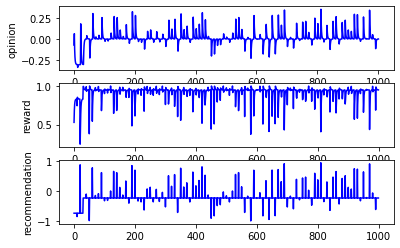

In [5]:
# Plot
simulator.agent.plot(save=False)